
# TL;DR Sample is the the core to reduce the CI, but not the methods. All methods generate similar CI. Additonally, Delta method is also much faster than bootstrap; The most effective way to reduce CI: (1) Take Log (2) or increase sample size

1. simulated skewed data (1) lognormal (2) random drop values to be zero as zero-inflated
2. compared thearitical mean/var with sampled mean, var. When sample size is not enough, the acutal var is actuall lower than theory.
3. with all three methods to compute CI, for ratio change
3. computed the sample size needed for small MDE.
4. with the right sample size(very large), redo confidence interval-> it is then statistically significanta




In [ ]:
# Auto-reload modules
%load_ext autoreload
%autoreload 2


In [3]:
# independent project
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import data

from data.gen_sample_ab import generate_ab_data, plot_ab_distributions


In [4]:
from utils.utils_ab_test import calculate_ratio_confidence_intervals, calculate_sample_size

In [5]:

#plot_ab_distributions(df[df['value']>0])
#df.groupby('group').agg({'value': ['mean', 'std', 'size','max']})


# small relative lift for skewed data: std is 10x of mean


Theoretical Statistics:
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 9.84, Std: 80.72


Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 494261.61it/s]


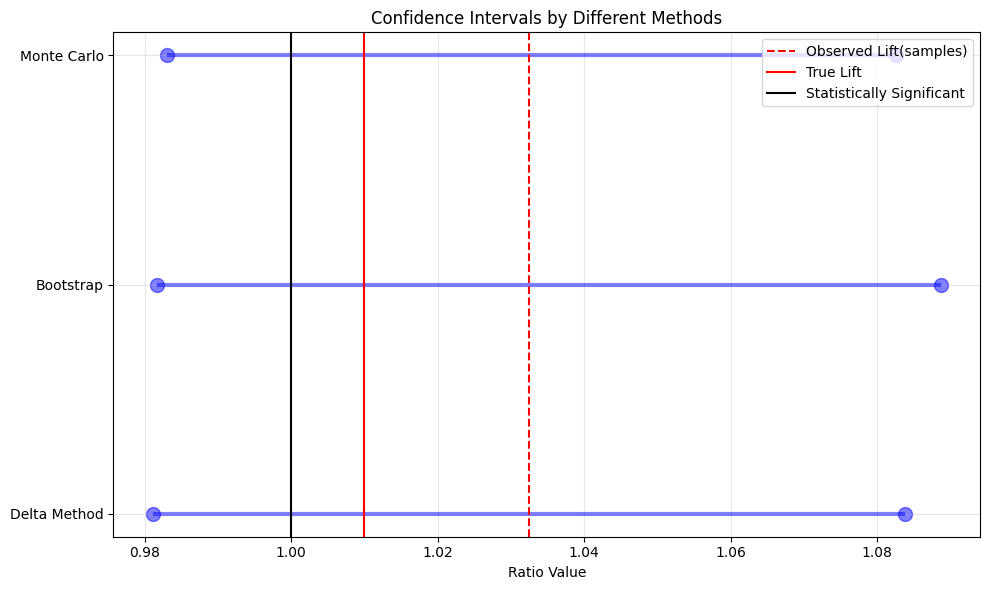

{'ratio': 1.0324653022792267,
 'delta_method_ci': (0.9811243733480915, 1.0838062312103618),
 'bootstrap_ci': array([0.98173853, 1.08864009]),
 'monte_carlo_ci': array([0.98303122, 1.08260332])}

In [6]:

true_relative_diff = 0.01


# df= generate_ab_data(
#         n_samples=100000,
#         data_type='skewed',
#         control_mean=0.5,  # mean parameter for log-normal
#         treatment_relative_effect=true_relative_diff,
#         sigma=2,
#         zero_prob=0.2,
#         lower_bound=-float('inf'),
#         upper_bound=float('inf'),
#         random_state=42
#     )

df= generate_ab_data(
        n_samples=100000,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )

results = calculate_ratio_confidence_intervals(df, value_col = 'value')
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data preparation
methods = ['Delta Method', 'Bootstrap', 'Monte Carlo']
lower_bounds = [
    results['delta_method_ci'][0],
    results['bootstrap_ci'][0],
    results['monte_carlo_ci'][0]
]
upper_bounds = [
    results['delta_method_ci'][1], 
    results['bootstrap_ci'][1],
    results['monte_carlo_ci'][1]
]

# Plot
y_pos = range(len(methods))
ax.hlines(y=y_pos, xmin=lower_bounds, xmax=upper_bounds, color='blue', alpha=0.5, linewidth=3)
ax.scatter(lower_bounds, y_pos, color='blue', alpha=0.5, s=100)
ax.scatter(upper_bounds, y_pos, color='blue', alpha=0.5, s=100)

# Add vertical line for the ratio
ax.axvline(x=results['ratio'], color='red', linestyle='--', label='Observed Lift(samples)')
ax.axvline(x=true_relative_diff+1, color='red', linestyle='-', label='True Lift')
ax.axvline(x=1, color='black', linestyle='-', label='Statistically Significant')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Ratio Value')
ax.set_title('Confidence Intervals by Different Methods')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Also display the numerical results
results

# We actually need a much larger sample size to get a stable CI.

In [7]:
calculate_sample_size(baseline_metric = 9, variance = 79*79,
                       mde_relative=true_relative_diff, metric_type='continuous', 
                         alpha=0.05, power=0.8)

12095027

# if we have right sample size, see which method is better


Theoretical Statistics:
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 9.84, Std: 80.72


Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 321033.60it/s]


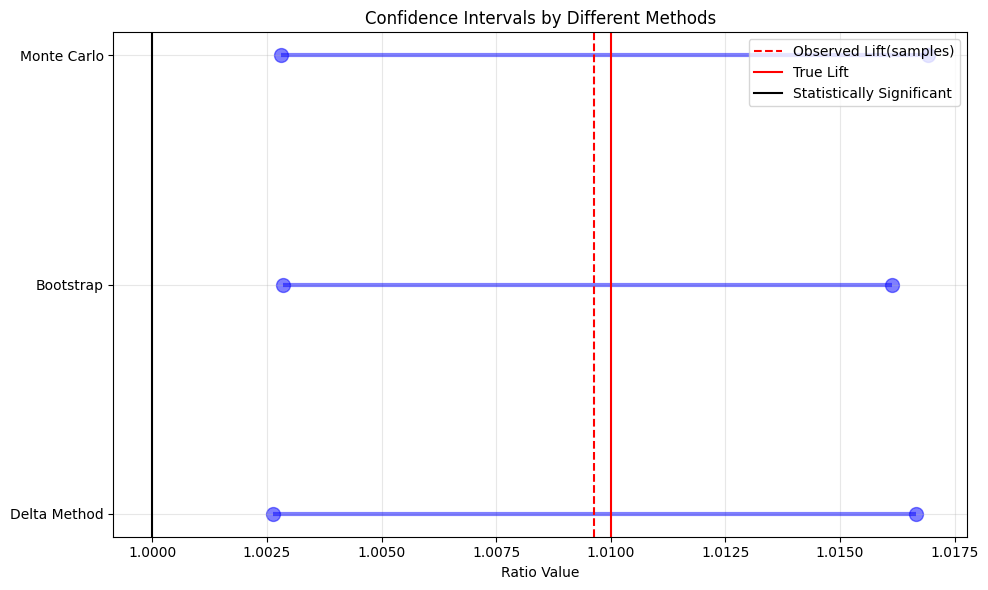

{'ratio': 1.0096396633831461,
 'delta_method_ci': (1.002627431478025, 1.0166518952882673),
 'bootstrap_ci': array([1.0028505 , 1.01614214]),
 'monte_carlo_ci': array([1.00281804, 1.01692147])}

In [8]:

true_relative_diff = 0.01

df= generate_ab_data(
        n_samples=10000000,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )

results = calculate_ratio_confidence_intervals(df, value_col = 'value')
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data preparation
methods = ['Delta Method', 'Bootstrap', 'Monte Carlo']
lower_bounds = [
    results['delta_method_ci'][0],
    results['bootstrap_ci'][0],
    results['monte_carlo_ci'][0]
]
upper_bounds = [
    results['delta_method_ci'][1], 
    results['bootstrap_ci'][1],
    results['monte_carlo_ci'][1]
]

# Plot
y_pos = range(len(methods))
ax.hlines(y=y_pos, xmin=lower_bounds, xmax=upper_bounds, color='blue', alpha=0.5, linewidth=3)
ax.scatter(lower_bounds, y_pos, color='blue', alpha=0.5, s=100)
ax.scatter(upper_bounds, y_pos, color='blue', alpha=0.5, s=100)

# Add vertical line for the ratio
ax.axvline(x=results['ratio'], color='red', linestyle='--', label='Observed Lift(samples)')
ax.axvline(x=true_relative_diff+1, color='red', linestyle='-', label='True Lift')
ax.axvline(x=1, color='black', linestyle='-', label='Statistically Significant')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Ratio Value')
ax.set_title('Confidence Intervals by Different Methods')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Also display the numerical results
results

In [27]:
true_relative_diff = 0.03
df= generate_ab_data(
        n_samples=1000,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )
df['log_value'] = np.log1p(df['value'])

results1 = calculate_ratio_confidence_intervals(df, value_col = 'log_value')
results2 = calculate_ratio_confidence_intervals(df, value_col = 'value')
print(results1)
print(results2)




Data Generation Process - Theoretical Statistics:

--------------------------------------------------
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 10.04, Std: 82.36
Treatment/Control Rel Lift: 0.03

--------------------------------------------------
Treatment group statistics:
  Mean: 1.1091
  Std dev: 1.2536
  Sample size: 1000

Control group statistics:
  Mean: 1.0502
  Std dev: 1.2288
  Sample size: 1000


Running bootstrap_ci:   0%|          | 0/1000 [00:00<?, ?it/s]

Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 449984.34it/s]


Treatment group statistics:
  Mean: 12.7056
  Std dev: 140.9784
  Sample size: 1000

Control group statistics:
  Mean: 10.8287
  Std dev: 61.2450
  Sample size: 1000


Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 484946.70it/s]

{'ratio': 1.0561035617927153, 'delta_method_ci': (0.9496206728007057, 1.1625864507847248), 'bootstrap_ci': array([0.95349511, 1.17029982]), 'monte_carlo_ci': array([0.96101966, 1.16407685])}
{'ratio': 1.173327269936172, 'delta_method_ci': (0.2676346260990834, 2.079019913773261), 'bootstrap_ci': array([0.56654634, 2.50806126]), 'monte_carlo_ci': array([0.39446173, 2.3772131 ])}


In [32]:
calculate_sample_size(baseline_metric = 1.05, variance = 1.22*1.22,
                       mde_relative=0.02, metric_type='continuous', 
                         alpha=0.05, power=0.8)

52981

# Take log!!! reduce sample size neede significantly!!


Data Generation Process - Theoretical Statistics:

--------------------------------------------------
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 10.25, Std: 84.02
Treatment/Control Rel Lift: 0.05

--------------------------------------------------
Control Group - Mean: 1.07, Std: 1.23
Treatment Group - Mean: 1.09, Std: 1.24
Treatment/Control Rel Lift: 0.02


Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 454716.39it/s]


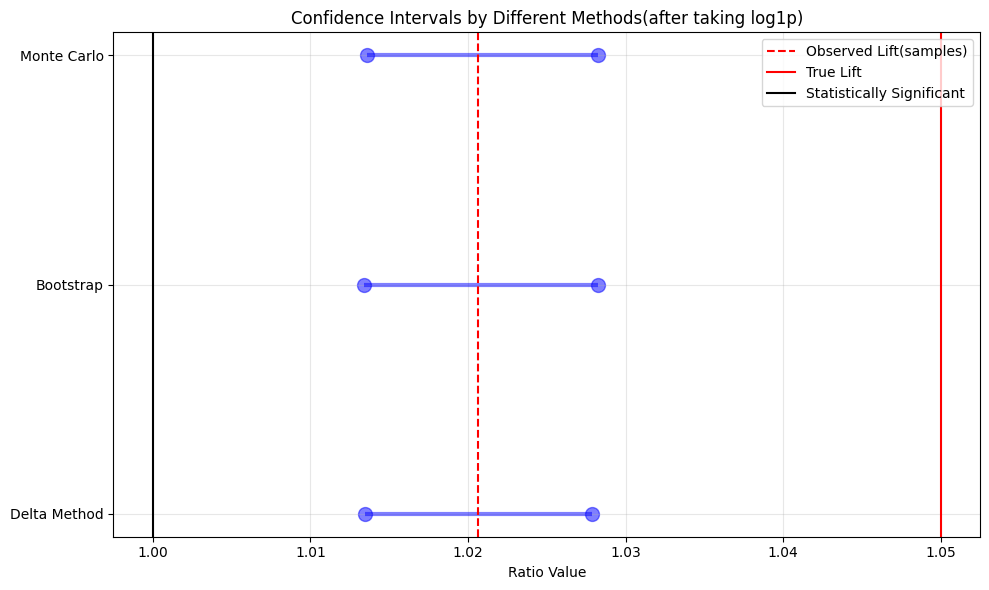

{'ratio': 1.0206485984986504,
 'delta_method_ci': (1.01345011974755, 1.0278470772497508),
 'bootstrap_ci': array([1.01338744, 1.02824448]),
 'monte_carlo_ci': array([1.01361911, 1.02826806])}

In [37]:

true_relative_diff = 0.05

df= generate_ab_data(
        n_samples=200000,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )
df['log_value'] = np.log1p(df['value'])
results = calculate_ratio_confidence_intervals(df, value_col = 'log_value')
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data preparation
methods = ['Delta Method', 'Bootstrap', 'Monte Carlo']
lower_bounds = [
    results['delta_method_ci'][0],
    results['bootstrap_ci'][0],
    results['monte_carlo_ci'][0]
]
upper_bounds = [
    results['delta_method_ci'][1], 
    results['bootstrap_ci'][1],
    results['monte_carlo_ci'][1]
]

# Plot
y_pos = range(len(methods))
ax.hlines(y=y_pos, xmin=lower_bounds, xmax=upper_bounds, color='blue', alpha=0.5, linewidth=3)
ax.scatter(lower_bounds, y_pos, color='blue', alpha=0.5, s=100)
ax.scatter(upper_bounds, y_pos, color='blue', alpha=0.5, s=100)

# Add vertical line for the ratio
ax.axvline(x=results['ratio'], color='red', linestyle='--', label='Observed Lift(samples)')
ax.axvline(x=true_relative_diff+1, color='red', linestyle='-', label='True Lift')
ax.axvline(x=1, color='black', linestyle='-', label='Statistically Significant')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Ratio Value')
ax.set_title('Confidence Intervals by Different Methods(after taking log1p)')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Also display the numerical results
results


Data Generation Process - Theoretical Statistics:

--------------------------------------------------
Note: Theoretical statistics before applying bounds:
Control Group - Mean: 9.75, Std: 79.92
Treatment Group - Mean: 10.25, Std: 84.02
Treatment/Control Rel Lift: 0.05

--------------------------------------------------
Control Group - Mean: 9.78, Std: 62.07
Treatment Group - Mean: 10.33, Std: 89.63
Treatment/Control Rel Lift: 0.06


Running monte_carlo_ci: 100%|██████████| 1000/1000 [00:00<00:00, 502251.71it/s]


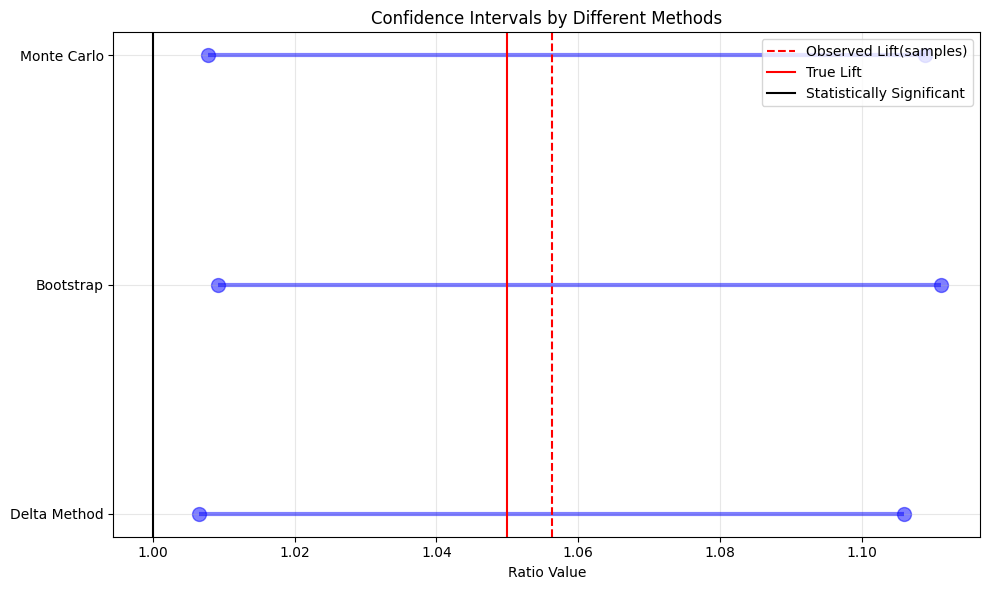

{'ratio': 1.056273043378899,
 'delta_method_ci': (1.0065133604211298, 1.106032726336668),
 'bootstrap_ci': array([1.00913663, 1.11116116]),
 'monte_carlo_ci': array([1.0077593 , 1.10894956])}

In [38]:

true_relative_diff = 0.05

df= generate_ab_data(
        n_samples=200000,
        data_type='skewed',
        control_mean=0.5,  # mean parameter for log-normal
        treatment_relative_effect=true_relative_diff,
        sigma=2,
        zero_prob=0.2,
        lower_bound=-float('inf'),
        upper_bound=float('inf'),
        random_state=42
    )

results = calculate_ratio_confidence_intervals(df, value_col = 'value')
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data preparation
methods = ['Delta Method', 'Bootstrap', 'Monte Carlo']
lower_bounds = [
    results['delta_method_ci'][0],
    results['bootstrap_ci'][0],
    results['monte_carlo_ci'][0]
]
upper_bounds = [
    results['delta_method_ci'][1], 
    results['bootstrap_ci'][1],
    results['monte_carlo_ci'][1]
]

# Plot
y_pos = range(len(methods))
ax.hlines(y=y_pos, xmin=lower_bounds, xmax=upper_bounds, color='blue', alpha=0.5, linewidth=3)
ax.scatter(lower_bounds, y_pos, color='blue', alpha=0.5, s=100)
ax.scatter(upper_bounds, y_pos, color='blue', alpha=0.5, s=100)

# Add vertical line for the ratio
ax.axvline(x=results['ratio'], color='red', linestyle='--', label='Observed Lift(samples)')
ax.axvline(x=true_relative_diff+1, color='red', linestyle='-', label='True Lift')
ax.axvline(x=1, color='black', linestyle='-', label='Statistically Significant')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.set_xlabel('Ratio Value')
ax.set_title('Confidence Intervals by Different Methods')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# Also display the numerical results
results